# Quandela Training Seminar - Programming with Perceval

In [1]:
import perceval as pcvl
from perceval.components.unitary_components import PERM,PS,BS
import numpy as np

### One and two-qubit gates

Below is a list of commonly used quantum gates that can easily be applied to optical quantum computing in Perceval. The list is split into two, for one-qubit and two-qubit gates.

Before we start, a quick reminder that we use a dual-rail encoding. This means that we encode one physical qubit using 2 modes, where a photon found in one or the other mode represent the qubit's excited or ground state.

#### One-qubit gates

One-qubit gates can be applied to quantum optical systems in Perceval in the form of beam splitters with different reflectivity angles, applied to 2 input modes, phase shifters or simple permutations.

##### Pauli-X gate

A Pauli-X gate or the NOT gate can be built by applying a permutation that swaps the two input modes.

In [2]:
#TO DO: design the Pauli-X gate in Perceval and display it

To check this is correct, you can print the unitary matrix that drives the action of this beam splitter.

In [3]:
pcvl.pdisplay(Pauli_X.compute_unitary())

##### Pauli-Y gate

Similarly, for the Pauli-Y gate we can first apply the Pauli-X gate and then add phase shifters with phases $-\frac{\pi}{2}$ and $\frac{\pi}{2}$ on modes 0 and 1 respectively.

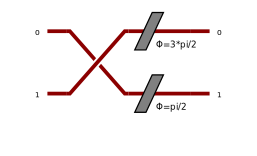

In [4]:
Pauli_Y = PERM([1,0]) // (0,PS(-np.pi/2)) // (1,PS(np.pi/2))
pcvl.pdisplay(Pauli_Y)

We can again check the matrix of this unitary transformation to convince ourselves it works correctly.

In [3]:
#TO DO: check the unitary

##### Pauli-Z gate

To apply a Pauli-Z gate, we can note that it is a rotation on the Z axis with an angle of $\pi$. We can build this gate in Perceval by applying a phase shifter with phase $\pi$ on the second of the two modes.

In [5]:
#TO DO: design the Pauli-Z gate in Perceval and display it

And once again we can verify the action of this circuit by checking its unitary.

In [4]:
#TO DO: check the unitary

##### Hadamard gate

Finally, we apply a Hadamard gate by using a beam splitter with a predefined reflectivity angle that ensures the action of a Hadamard gate.

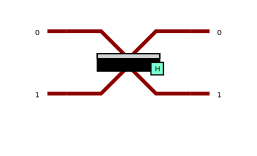

In [11]:
Hadamard = BS.H()
pcvl.pdisplay(Hadamard)

And we can print its unitary to check its action as well.

In [6]:
#TO DO: check the unitary

#### Two-qubit gates

##### CZ-gate

The CZ-gate is a two-qubit controlled-Z gate, meaning that the action of the Pauli-Z gate is performed on the target qubit if the control logical qubit is $|1\rangle$.

The controlled-Z gate and its full circuit decomposition can be found in the Perceval catalog. This circuit also requires the use of ancillas and heralded gates.

HERALDED CZ DOCUMENTATION
--------------------------

CZ gate with 2 heralded modes

Scientific article reference: https://arxiv.org/abs/quant-ph/0110144

Schema:
                      ╭─────╮
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      │     │
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      ╰─────╯



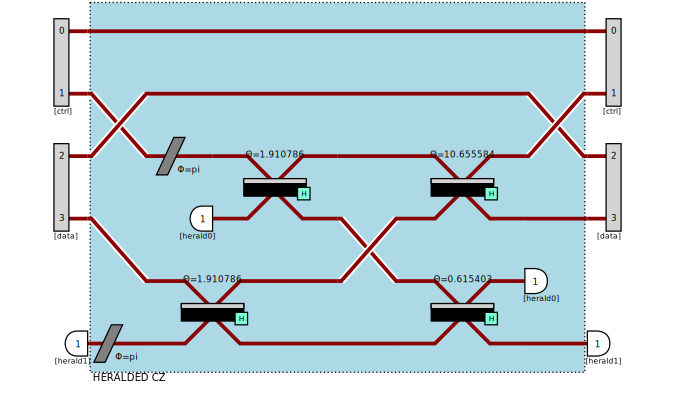

In [14]:
from perceval.components import catalog
print(catalog['heralded cz'].doc)
heralded_cz = catalog['heralded cz'].as_processor().build()

pcvl.pdisplay(heralded_cz, recursive=True)

Note that there's another way that we can build the CZ-gate. You may have seen before that the following holds: $Z=HXH$. It can similarly be shown that one can build a CZ-gate by applying a CNOT-gate sandwiched between two Hadamard gates.

In [ ]:
#TO DO: Use the previously defined Pauli-Z, Pauli-X and Hadamard gates to prove the claim that a Pauli-X gate sandwiched between two Hadamard gates
# has the same action as a Pauli-Z gate. Display their unitaries and convince yourself that this is true.

##### CNOT-gate

A CNOT-gate (controlled-NOT gate) is a two-qubit gate where one qubit acts as a control and the other as a target. If the control logical qubit is $|1\rangle$, the target qubit is flipped (the Pauli-X or NOT-gate is applied), otherwise no action is taken.

Knill, Laflamme and Milburn famously showed that a CNOT circuit can be built in a photonic quantum setting simply by using ancillas (additional photons) in an optical circuit with linear optical components and measurement. This is an important result and can be used for generation of entanglement.

You can find the full circuit decomposition in the Perceval catalog.

Note that this circuit requires the use of heralded gates and ancillas. The ancillas are measured separately from the other photons in the circuit and their measurement is used to check whether a gate performed its action well. This gate is then referred to as a heralded gate. Its action needs to be checked because two-qubit gates in dual-rail encoding are probabilistic, and therefore have a probability to fail.

HERALDED CNOT DOCUMENTATION
----------------------------

CNOT gate with 4 heralded modes

Scientific article reference: https://doi.org/10.1073/pnas.1018839108

Schema:
                      ╭─────╮
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      │     │
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      ╰─────╯



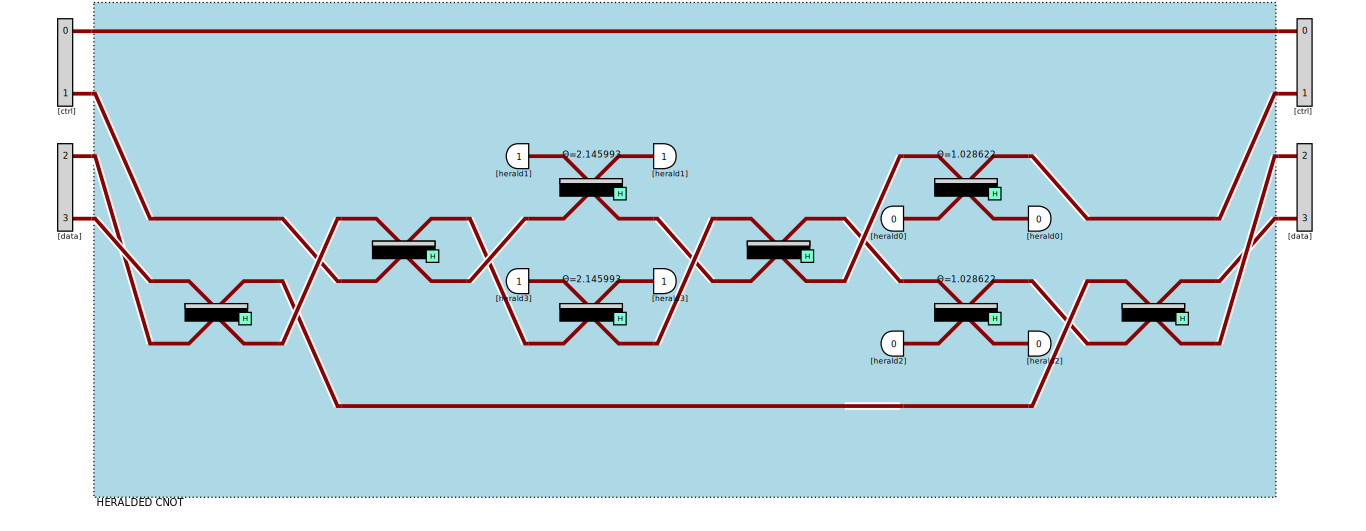

In [13]:
print(catalog['heralded cnot'].doc)
heralded_cnot = catalog['heralded cnot'].as_processor().build()

pcvl.pdisplay(heralded_cnot, recursive=True) # we set recursive=True to show the full set of linear optical components used to build this circuit

##### SWAP gate

A two-qubit SWAP gate swaps the two qubit wires qubits travel through. For example the state $|1,0\rangle$ becomes $|0,1\rangle$ after passing through a SWAP gate.

In [7]:
#TO DO: create and display a two-qubit SWAP gate, keeping in mind the dual-rail encoding